In [4]:
import tensorflow as tf
import os
import cv2 as cv
import keras
import numpy as np
import math
from matplotlib import pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
Image_size =256
Batch_size =64
Channels =3
Epoch = 20

In [6]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
'Dataset',
shuffle = True,
image_size = (Image_size,Image_size),
batch_size = Batch_size
    )

Found 1322 files belonging to 2 classes.


In [7]:
label = datasets.class_names
label

['Bad cube', 'Good cube']

In [8]:
len(datasets)

21

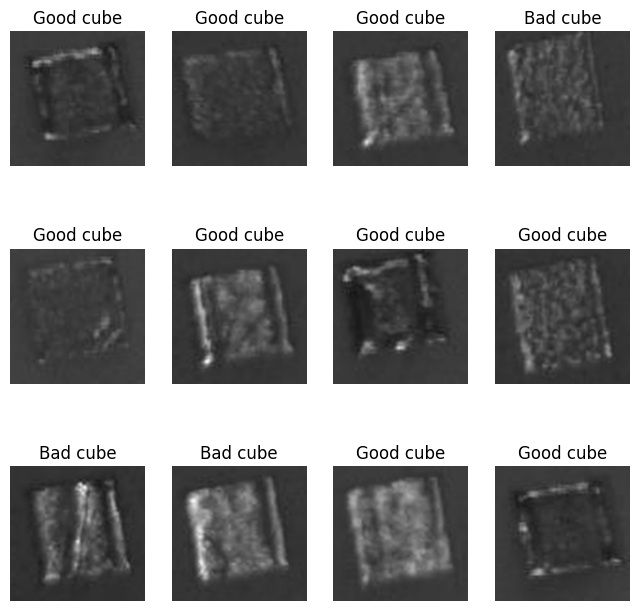

In [9]:
plt.figure(figsize=(8,8))
for image_batch, label_batch in datasets.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,(i+1))
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title( label[label_batch[i]])
        plt.axis("off")

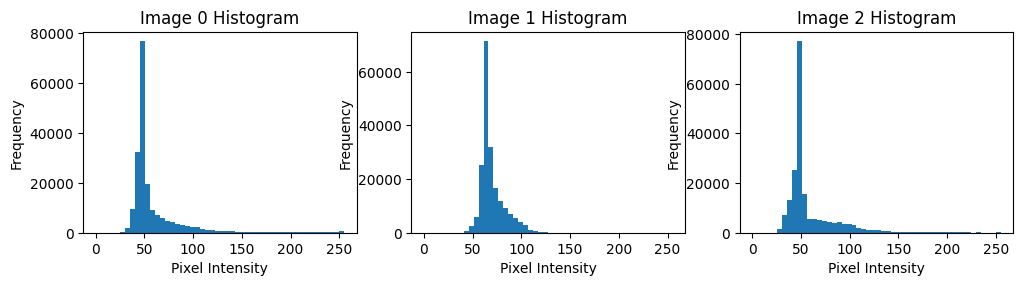

In [46]:
plt.figure(figsize=(12, 12))

# Assuming 'datasets' is an iterable of (image_batch, label_batch) pairs
for image_batch, label_batch in datasets.take(1):
    for i in range(3):
        ax = plt.subplot(4, 3, i+1)
        
        # Flatten the image to 1D array to compute the histogram
        image_data = image_batch[i].numpy().astype("uint8").flatten()
        
        # Plotting the histogram
        # 'bins' define the number of equal-width bins in the range
        # 'range' is the interval : [0, 255] for grayscale or each color channel
        # 'color' can be set if you want to specify the histogram color
        plt.hist(image_data, bins=50, range=[0, 255])
        
        # You might want to give a title to each subplot to indicate the image index or any other relevant info
        plt.title(f'Image {i} Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        # Optional: If you don't want the axis ticks, uncomment the line below
        # plt.axis("off")


In [10]:
initial_split = 0.9  # 90% for training to later split into train and test
validation_split = 0.1  # 10% for validation
# The directory where your dataset is located
dataset_dir = 'Dataset'
# Create the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size,
    shuffle=True
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size,
    shuffle=True
)
# Calculate the number of batches in the training dataset
total_train_batches = len(train_ds)
# Calculate the number of batches for 10% of the data
test_size = int(total_train_batches * 0.1)
# Split the training dataset into training and testing
test_ds = train_ds.take(test_size)
train_ds = train_ds.skip(test_size)
input_shape = (Image_size, Image_size, 3)
n_classes = 3

Found 1322 files belonging to 2 classes.
Using 1190 files for training.
Found 1322 files belonging to 2 classes.
Using 132 files for validation.


In [51]:
from tensorflow.keras import models, layers

def create_model(input_shape, n_classes):
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=input_shape),  # Updated line here
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Example usage
input_shape = (150, 150, 3)  # Example input shape
n_classes = 10  # Example number of classes
model = create_model(input_shape, 1)


In [52]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)      

In [30]:
from tensorflow.keras import models, layers

def create_model(input_shape, n_classes):
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),  # Add this layer to reduce the dimension further
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ])
    return model

# Adjusted input shape for the model to match the training data
input_shape = (256, 256, 3)
n_classes = 10  # The number of classes in your dataset
model = create_model(input_shape, n_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to verify the output shape before training
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 128)      

In [31]:


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Adjust the number of epochs based on your dataset size and desired training time
)
# Optional: Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print('\nTest accuracy:', test_acc)

Epoch 1/10
18/18 [==============================] - 22s 1s/step - loss: 1.1467 - accuracy: 0.5187 - val_loss: 0.7132 - val_accuracy: 0.5455
Epoch 2/10
18/18 [==============================] - 23s 1s/step - loss: 0.6471 - accuracy: 0.6341 - val_loss: 0.6188 - val_accuracy: 0.6818
Epoch 3/10
18/18 [==============================] - 25s 1s/step - loss: 0.5691 - accuracy: 0.7282 - val_loss: 0.5961 - val_accuracy: 0.6667
Epoch 4/10
18/18 [==============================] - 25s 1s/step - loss: 0.5594 - accuracy: 0.7158 - val_loss: 0.5843 - val_accuracy: 0.7121
Epoch 5/10
18/18 [==============================] - 25s 1s/step - loss: 0.4950 - accuracy: 0.7638 - val_loss: 0.5439 - val_accuracy: 0.7121
Epoch 6/10
18/18 [==============================] - 25s 1s/step - loss: 0.4464 - accuracy: 0.7709 - val_loss: 0.4323 - val_accuracy: 0.7879
Epoch 7/10
18/18 [==============================] - 25s 1s/step - loss: 0.3975 - accuracy: 0.8073 - val_loss: 0.4623 - val_accuracy: 0.7652
Epoch 8/10
18/18 [==

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Extract the history data
history_dict = history.history
epochs_range = range(len(history_dict['accuracy']))

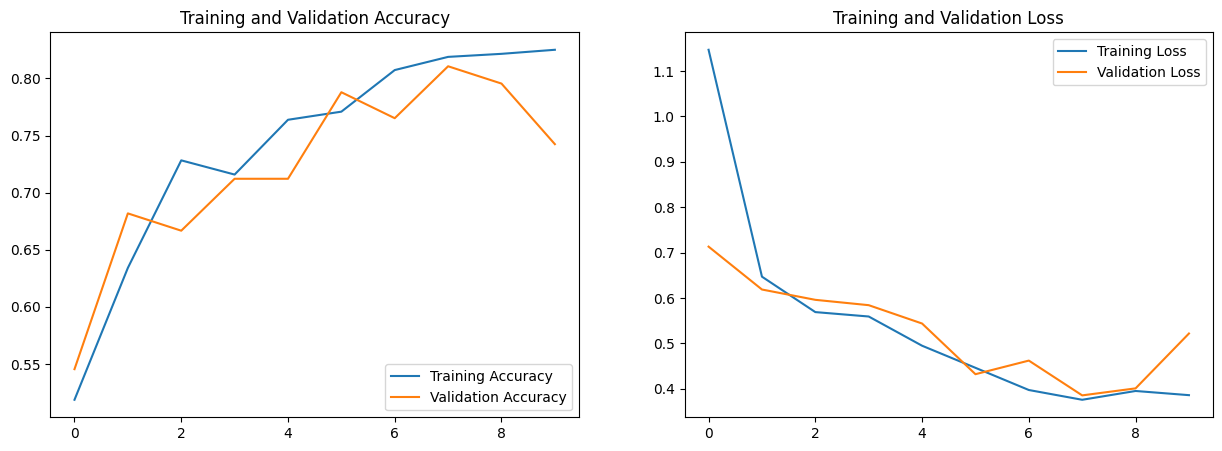

In [33]:
plt.figure(figsize=(15, 5))
# Plot training and validation accuracy per epoch
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
from tensorflow.keras import models, layers

def create_model(input_shape, n_classes):
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=input_shape),
        layers.Conv2D(32, (3, 3), use_bias=False),  # Remove biases since BatchNormalization has its own
        layers.BatchNormalization(),
        layers.Activation('relu'),  # Apply activation after BatchNormalization
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), use_bias=False),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), use_bias=False),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Flatten(),
        
        layers.Dense(128, use_bias=False),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        
        layers.Dense(n_classes, activation='sigmoid')
    ])
    return model

# Adjusted input shape for the model to match the training data
input_shape = (256, 256, 3)
n_classes = 10  # The number of classes in your dataset
model = create_model(input_shape, 1)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary to verify the output shape before training
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 254, 254, 32)      864       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 64)     

In [50]:
# Training the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs= 15  # Adjust the number of epochs based on your dataset size and desired training time
)
# Optional: Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print('\nTest accuracy:', test_acc)

Epoch 1/15
18/18 [==============================] - 49s 2s/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.1082 - val_accuracy: 0.9697
Epoch 2/15
18/18 [==============================] - 62s 3s/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0911 - val_accuracy: 0.9697
Epoch 3/15
18/18 [==============================] - 45s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9697
Epoch 4/15
18/18 [==============================] - 65s 4s/step - loss: 0.0047 - accuracy: 0.9973 - val_loss: 0.2141 - val_accuracy: 0.9697
Epoch 5/15
18/18 [==============================] - 82s 5s/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.1994 - val_accuracy: 0.9470
Epoch 6/15
18/18 [==============================] - 47s 3s/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.1159 - val_accuracy: 0.9621
Epoch 7/15
18/18 [==============================] - 68s 4s/step - loss: 0.0097 - accuracy: 0.9956 - val_loss: 0.0671 - val_accuracy: 0.9773
Epoch 8/15
18/18 [==

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Extract the history data
history_dict = history.history
epochs_range = range(len(history_dict['accuracy']))

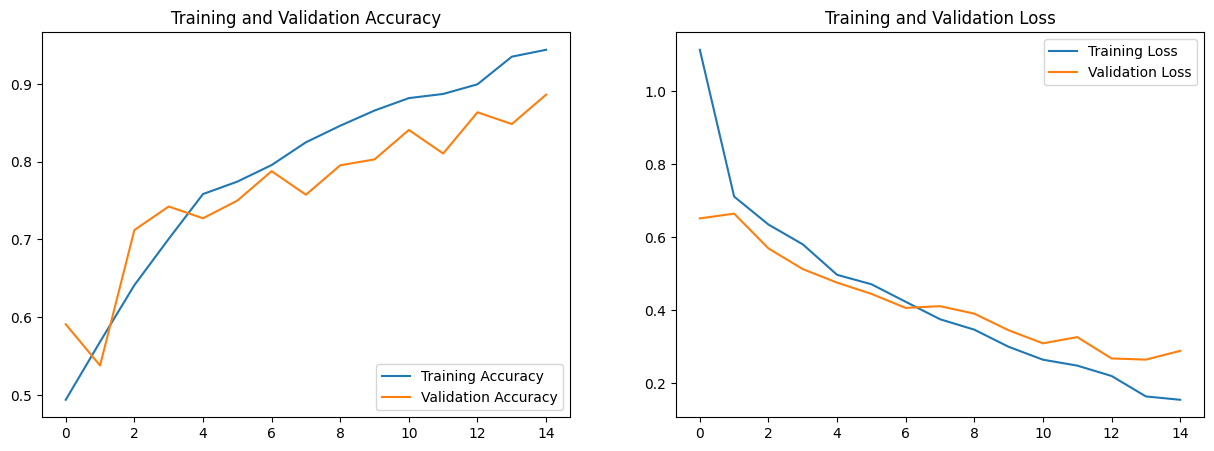

In [38]:
plt.figure(figsize=(15, 5))
# Plot training and validation accuracy per epoch
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()